# 로봇 배제 표준 문서
- 웹 사이트에 로봇이 접근하는 것을 방지하기 위한 규약
- 일반적으로 접근 제한에 대한 설명을 robots.txt 기술해 놓고 루트 디렉토리에 위치 시킨다.
- 이 규약은 권고안이며, 로봇이 robots.txt 파일을 읽고 접근을 중지하는 것을 목적으로 한다.
- 접근 방지 설정을 하였다고 해도, 다른 사람들이 그 파일에 접근할 수 있다

## 데이터 수집 시 주의 사항
- 로봇 배제 표준이 권고안이라도 불법으로 데이터를 수집하여 영업 혹은 저작권 침해에 해당된다면 법적 제재를 받을 수 있다.  
- https://ko.wikipedia.org/wiki/%EB%A1%9C%EB%B4%87_%EB%B0%B0%EC%A0%9C_%ED%91%9C%EC%A4%80

# 셀레니움(Selenium)
- Selenium은 주로 웹앱을 테스트하는데 사용하는 프레임워크
- webdriver라는 API를 통해 운영체제에 설치된 크롬 등의 브라우저를 제어
- Selenium 모듈 설치 후 사용
- 사용자 브라우저(Chrome, Edge, ..)에 맞는 webdriver를 다운로드 후 사용 가능
- 다운로드 사이트에서 본인이 사용하는 브라우저의 버전등을 확인 후 다운로드 (버전이 업데이트되면서 사라졌다.)
- 크롬: https://chromedriver.chromium.org/downloads
- Edge: https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/
- 파이어폭스:https://github.com/mozilla/geckodriver/releases

__주의__
최근 없데이트되면서 문법 변경됨

## webdriver
- selenium의 webdriver는 웹 응용 프로그램들의 테스트를 단순화 및 가속화해주는 툴

### 크롬 드라이브 다운(삭제됨)
1. 크롬 브라우저 버전을 확인한다.(크롬브라우저 점3개 클릭-도움말-정보)
2. 동일버전의 webdriver을 다운로드 [driver](https://googlechromelabs.github.io/chrome-for-testing/#stable/)
3. ./tools/chromedirver.exe

In [1]:
# !pip install selenium==4.15.2

In [2]:
import selenium
print(selenium.__version__)
import time
from selenium import webdriver

4.15.2


In [3]:
driver = webdriver.Chrome()
driver.get("https://www.naver.com")
time.sleep(10)
driver.close()
# 1. selenium 의 버전 3 -> 4 
# 2. chrome driver 가 더이상 지원 x
# 이전에는 selenium 설치, chromedriver 를 설치한후에 경로를 지정 -> 객체생성

### selenium 내장함수

#### 1. get()
- get() 함수는 입력한 url 주소로 접속하는 함수

```python
driver.get("url 주소")
```

#### 2. find_element(By.<location>, "")
- 정적크롤링의 find과 같은 역할로, 크롤링을 위해 HTML 요소를 찾는 함수
    
```python
from selenium.webdriver.common.by import By

find_element(By.ID, "id")
find_element(By.NAME, "name")
find_element(By.XPATH, "xpath")
find_element(By.LINK_TEXT, "link text")
find_element(By.PARTIAL_LINK_TEXT, "partial link text")
find_element(By.TAG_NAME, "tag name")
find_element(By.CLASS_NAME, "class name")
find_element(By.CSS_SELECTOR, "css selector")
```

__참고__ :  구버전의 find_element_by_ ?? 에서 변경되었다.

예) find_element(By.CSS_SELECTOR, "css selector")
- copy 목록의 copy selector를 통해 속성을 찾을 수 있다.
```python
driver.find_element(By.CSS_SELECTOR, "a#writeFormBtn")
```

    
예) find_element(By.ID, "id") & find_element(By.CLASS_NAME, "class name")
- id 속성 혹은 class 속성을 가지고 있는 경우 사용한다.

```python    
'글쓰기' 버튼 - <a href="#" id="writeFormBtn" class="btn_type1 post_write _rosRestrict" onclick="clickcr(this,'abt.wrtlist', '', '', event);">

driver.find_element(By.ID, "writeFormBtn")
driver.find_element(By.CLASS_NAME, "btn_type1.post_write._rosRestrict")
```

예) find_element(By.XPATH, "xpath")
- 적당한 id, class 속성이 없을 경우 xpath를 사용가능
- XPATH란 xml 문서의 특정 부분의 위치를 의미한다.
- html 요소를 우클릭하고 copy 목록의 copy xpath를 클릭해 사용가능

```python
driver.find_element(By.XPATH, 'XPath 선택자')

# ex) '글쓰기' 버튼의 'Copy XPath'결과 - //*[@id="writeFormBtn"]
driver.find_element_by_xpath('//*[@id="writeFormBtn"]')
```

#### 3. find_elements(By.??)
- 정적 크롤링의 find_all과 같은 역할로, 입력한 태그 및 선택자에 해당하는 모든 html 요소를 찾는 함수이다.
- element 뒤에 s가 붙는다.
- https://selenium-python.readthedocs.io/locating-elements.html#


#### 4. click()
- html 요소를 클릭하는 함수이다.

```python
driver.find_element(By.???, "????").click()

ex) 글쓰기 버튼 클릭
driver.find_element(By.CSS_SELECTOR,"a#writeFormBtn").click()
```

#### 5. send_keys()
- html 요소에 직접 텍스트를 입력하는 함수이다.

```python
driver.find_element_by_??().send_keys("텍스트")

ex) 검색 칸에 파이썬 입력
driver.find_element_by_css_selector("input#query").send_keys("파이썬")
```



# 브라우저를 통한 웹페이지 제어

In [5]:
from selenium.webdriver.common.by import By

In [6]:
driver = webdriver.Chrome()
driver.get("https://www.naver.com")
time.sleep(5)
driver.find_element(By.ID, "query").send_keys("오민엽")
time.sleep(5)
driver.find_element(By.ID, "search-btn").click()
time.sleep(10)
html = driver.page_source
driver.close()

In [7]:
from bs4 import BeautifulSoup as bs

In [8]:
soup = bs(html, "html.parser")

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/125.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="오민엽 : 네이버 검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'오민엽'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'오민엽'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>오민엽 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240523.css" rel="stylesheet" type="text/css"/> <link
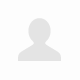
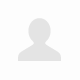

In [9]:
soup

In [10]:
driver = webdriver.Chrome()
driver.get("https://www.naver.com")
time.sleep(5)
driver.find_element(By.ID, "query").send_keys("문래역 맛집")
time.sleep(5)
driver.find_element(By.ID, "search-btn").click()
time.sleep(10)
html = driver.page_source
driver.close()

In [11]:
soup = bs(html, "html.parser")

In [14]:
for i in soup.find_all("span", {"class": "place_bluelink TYaxT"}):
    print(i.text)

한국의맛장수촌 영등포문래역점
솥돈 문래점
뽕씨네얼큰수제비 영등포본점
브라더매운갈비찜 문래본점
더루프로
동경화로 문래점
곱 문래본점
월화고기 문래점


In [19]:
#txtSource #txtTarget
driver = webdriver.Chrome()
driver.get("https://papago.naver.com/")
question = input("번역할 내용을 입력 하세요 : ")
driver.find_element(By.CSS_SELECTOR, "#txtSource").send_keys(question)
time.sleep(5)
output = driver.find_element(By.CSS_SELECTOR, "#txtTarget").text
driver.close()
print(f"결과 : {output}")

번역할 내용을 입력 하세요 :  hello world


결과 : 안녕 세계


In [ ]:
# 네이버 로그인
# 네이버에 서브계정을 하나 만드세요

# 네이버 로그인

In [77]:
# 네이버에 서브계정을 하나 만드세요
# 네이버에 로그인 까지
# 사람처럼 보이게 하는 방법
# 1. gpu 가속 중지 option
# 2. 가짜 플러그인 탑재 lang="ko_KR"
# 3. clipboard 를 이용해서 복사 붙여넣기를 사용한다. 
# !pip install pyperclip

In [23]:
import pyperclip #복붙에 사용할 모듈
from selenium.webdriver.common.keys import Keys # ctrl + v 를 위해 
import getpass #민감한 정보를 입력받는 모듈

In [26]:
driver = webdriver.Chrome()
driver.get("https://www.naver.com/")
driver.find_element(By.XPATH, '//*[@id="account"]/div/a').click()
user_id = getpass.getpass("id : ")
# user_pw
user_pw = getpass.getpass("pw : ")

pyperclip.copy(user_id)
driver.find_element(By.CSS_SELECTOR, "#id").click()
driver.find_element(By.CSS_SELECTOR, "#id").send_keys(Keys.CONTROL, "v")

pyperclip.copy(user_pw)
driver.find_element(By.CSS_SELECTOR, "#pw").click()
driver.find_element(By.CSS_SELECTOR, "#pw").send_keys(Keys.CONTROL, "v")

time.sleep(2)
driver.find_element(By.CSS_SELECTOR, "#log\.login").click()
time.sleep(5)
driver.close()

id :  ········
pw :  ········


In [ ]:
# 로그인후 블로그에 글을 게시할수 있게 만들어 보세요
# from selenium.webdriver.common.action_chains import ActionChains # 참고 https://hogni.tistory.com/78
# driver.find_element(By.CSS_SELECTOR, "#id").clear()
# https://blog.naver.com/apollo11plus?Redirect=Write




In [ ]:
# 로그인후 블로그에 글을 게시할수 있게 만들어 보세요
# from selenium.webdriver.common.action_chains import ActionChains
# driver.find_element(By.CSS_SELECTOR, "#id").clear()



In [ ]:
# GTP 로 캡챠 뚫기

import base64
import requests
import os
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# OpenAI API 키 설정
api_key = "sk-proj-APy33NhBZV5REhm4dZNRT3BlbkFJ26x4H5N7uJ6zUJ20XGQW"

# 사용자로부터 질문을 입력받음
question = input("질문을 입력하세요: ")

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

payload = {
    "model": "gpt-4o",
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": question
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_base64
                    }
                }
            ]
        }
    ],
    "max_tokens": 1000
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

if response.status_code == 200:
    content = response.json()['choices'][0]['message']['content']
    # 응답 출력
    print("GPT-4o 응답:", content)
else:
    print(f"Error: {response.status_code}")
    print(response.json())


In [29]:
def login_naver(id_, pw_):
    driver = webdriver.Chrome()
    driver.get("https://www.naver.com/")
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="account"]/div/a').click()
    pyperclip.copy(id_)# 클립 보드로 복사됨 
    driver.find_element(By.CSS_SELECTOR, "#id").click()
    driver.find_element(By.CSS_SELECTOR, "#id").send_keys(Keys.CONTROL, "v") # 붙여넣기
    time.sleep(2)

    pyperclip.copy(pw_)# 클립 보드로 복사됨 
    driver.find_element(By.CSS_SELECTOR, "#pw").click()
    driver.find_element(By.CSS_SELECTOR, "#pw").send_keys(Keys.CONTROL, "v") # 붙여넣기
    time.sleep(2)
    driver.find_element(By.CSS_SELECTOR, "#log\.login").click()
    return driver

In [30]:
id_ = getpass.getpass("id: ")
pw_ = getpass.getpass("pw: ")

id:  ········
pw:  ········


In [31]:
driver = login_naver(id_,pw_)

In [33]:
# 프레임 전환
driver.get("https://blog.naver.com/apollo11plus?Redirect=Write")
frame = driver.find_element(By.ID, "mainFrame")
driver.switch_to.frame(frame)

In [40]:
# title = driver.find_element(By.CSS_SELECTOR, "#SE-82c7a385-a327-4536-bcad-3250abc5e939 > span.se-placeholder.__se_placeholder.se-ff-nanumgothic.se-fs32.se-placeholder-focused")
from selenium.webdriver.common.action_chains import ActionChains
title = driver.find_element(By.CSS_SELECTOR, ".se-placeholder.__se_placeholder.se-fs32")
action = ActionChains(driver)
post_title = "안녕하세요 봇 입니다. 언제 끝나죠? 제발 죽여줘..."
action.move_to_element(title).pause(1).click().send_keys(post_title).perform()
# https://www.geeksforgeeks.org/perform-method-action-chains-in-selenium-python/
print("작성완료")


# 포스팅 내용은 과제 


작성완료


In [38]:
title.text

'제목'